In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate
np.set_printoptions(precision=6) #Mostrar numeros con maximo seis digitos de precision
np.set_printoptions(suppress=True) # Suprimir uso de notacion cientifica para numeros muy pequenos

In [99]:
N = 23 # Numero de periodos
mYah = 2 # Numero de acciones extraidas de Yahoo
mFin = 4 # Numero de acciones extraidas de Finance.com
m = mYah + mFin # Numero de acciones

precios = np.zeros((m, N+1))
retornos = np.zeros((m, N))

Extrayendo columnas de los archivos de Yahoo Finance:

In [100]:
archivosYahoo = ['csvs/CIB.csv', 'csvs/EC.csv']

In [101]:
for k in range(mYah):
    archivo = archivosYahoo[k]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N+1):
        precios[k, i] = lector.__next__()[5] #Extraer la 5ta columna: precio de cierre ajustado
        if (i > 0):
            retornos[k, i-1] = (precios[k, i] - precios[k, i-1])/precios[k, i-1]

Extrayendo columnas de los archivos de Investing.com

In [109]:
 archivosFin = [ 'csvs/CFV-2.csv', 'csvs/FTSE-2.csv', 'csvs/IMI-2.csv', 'csvs/BIC_p1-2.csv']

In [110]:
for k in range(mYah, mYah + mFin):
    archivo = archivosFin[k - mYah]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N, -1, -1):
        precios[k, i] = lector.__next__()[1] #Extraer la 1era columna: precio de cierre
        if (i < N):
            retornos[k, i] = (precios[k, i+1] - precios[k, i])/precios[k, i]

In [111]:
np.shape(retornos)

(6, 23)

TODO: Explicar, a la luz de la lectura 1, la naturaleza de esos activos.

# 3

Vector de Rendimientos promedio

In [112]:
retProm = np.mean(retornos, 1, keepdims = True) # Hallar el promedio de la matriz de retornos a lo largo del eje temporal
print("Tamaño de matriz de rentabilidades:", np.shape(retProm)) # En efecto el vector retProm tiene tamaño 7x1, donde 7 es el número de activos
print("Retornos promedio:\n", retProm)

Tamaño de matriz de rentabilidades: (6, 1)
Retornos promedio:
 [[0.018164]
 [0.031721]
 [0.001484]
 [0.010866]
 [0.005016]
 [0.019599]]


Matriz de Covarianzas

In [113]:
S = np.zeros((m, m)) # Inicializacion en 0's

for k in range(m): # Iterar con k sobre activos
    for l in range(m): # Iterar con l sobre activos
        for i in range(N): # Iterar sobre el tiempo con i
            # Para la combinacion de activos k y l se suma la contribución a la covarianza por el tiempo i
            S[k, l] += (retornos[k, i] - retProm[k])*(retornos[l, i] - retProm[l]) 
            
print("Matriz de covarianzas:\n", S)

Matriz de covarianzas:
 [[0.132956 0.126677 0.081049 0.068264 0.074749 0.084089]
 [0.126677 0.396993 0.089865 0.105785 0.088195 0.050704]
 [0.081049 0.089865 0.195841 0.069729 0.070606 0.066326]
 [0.068264 0.105785 0.069729 0.053816 0.042587 0.049801]
 [0.074749 0.088195 0.070606 0.042587 0.083977 0.040482]
 [0.084089 0.050704 0.066326 0.049801 0.040482 0.071042]]


## Matriz de Covarianzas es Definida Positiva

### Matriz Cuadrada

In [114]:
np.shape(S)

(6, 6)

### Simétrica

In [115]:
S - S.transpose() # Debería ser igual a su transpuesta,  y lo es pues su diferencia es 0

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Definida Positiva

Usamos la caracterización vista en clase: los subdeterminantes en línea son positivos. En particular vemos que el determinante de la matriz es distinto de $0$.

In [116]:
for k in range(1,m):
    submatPpal = S[:k, :k]
    detp = np.linalg.det(submatPpal)
    print("El determinante de la submatriz  de tamaño ", np.shape(submatPpal), " que contiene la entrada 1,1, es decir la matriz\n", submatPpal, " es ", detp, "!= 0\n")

El determinante de la submatriz  de tamaño  (1, 1)  que contiene la entrada 1,1, es decir la matriz
 [[0.132956]]  es  0.1329558408622693 != 0

El determinante de la submatriz  de tamaño  (2, 2)  que contiene la entrada 1,1, es decir la matriz
 [[0.132956 0.126677]
 [0.126677 0.396993]]  es  0.03673544189349243 != 0

El determinante de la submatriz  de tamaño  (3, 3)  que contiene la entrada 1,1, es decir la matriz
 [[0.132956 0.126677 0.081049]
 [0.126677 0.396993 0.089865]
 [0.081049 0.089865 0.195841]]  es  0.005358070634840404 != 0

El determinante de la submatriz  de tamaño  (4, 4)  que contiene la entrada 1,1, es decir la matriz
 [[0.132956 0.126677 0.081049 0.068264]
 [0.126677 0.396993 0.089865 0.105785]
 [0.081049 0.089865 0.195841 0.069729]
 [0.068264 0.105785 0.069729 0.053816]]  es  4.3044880515620475e-05 != 0

El determinante de la submatriz  de tamaño  (5, 5)  que contiene la entrada 1,1, es decir la matriz
 [[0.132956 0.126677 0.081049 0.068264 0.074749]
 [0.126677 0.396

In [117]:
Sinv = np.linalg.inv(S)
print(Sinv)

[[  81.947755  -23.770666    1.37173    68.565766  -29.690204 -112.460076]
 [ -23.770666   19.691024    5.421978  -72.002196    5.175814   56.545481]
 [   1.37173     5.421978   12.603102  -32.48131    -5.095134    8.413252]
 [  68.565766  -72.002196  -32.48131   343.671898  -22.776115 -227.38348 ]
 [ -29.690204    5.175814   -5.095134  -22.776115   32.515637   33.643684]
 [-112.460076   56.545481    8.413252 -227.38348    33.643684  239.20529 ]]


In [118]:
S.dot(Sinv)

array([[ 1.,  0.,  0.,  0., -0., -0.],
       [-0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [-0.,  0.,  0., -0.,  0.,  1.]])

# 4

Parámetros de la teoría

In [119]:
u = np.ones((m, 1))

A = u.transpose().dot(Sinv.dot(u))[0,0]
B = u.transpose().dot(Sinv.dot(retProm))[0,0]
C = retProm.transpose().dot(Sinv.dot(retProm))[0,0]
D = A*C - B**2

print("A =", A, "\t B =", B, "\t C =", C, ", entonces D =", D)

A = 36.5917541833435 	 B = 0.1020322922741066 	 C = 0.02390580091029897 , entonces D = 0.8643446017989004


# 5

Ecuación general de los portafolios óptimos dados los parámetros de la teoría $A, B, C$ y el parámetro $\mu$: $x*(\mu) = (\frac{C - B\mu}{D}) S^{-1} \hat u + (\frac{A \mu - B}{D})S^{-1}\bar r$, en nuestro caso, como:

In [120]:
def xOptMu(mu):
    return ((C - B*mu)/D) * Sinv.dot(u) + ((A*mu - B)/D) * Sinv.dot(retProm)

rentDeseadas = np.linspace(0., 0.02, 9).reshape((9,1,1))

portOptMu = np.zeros( (len(rentDeseadas), m, 1) )

for i in range(len(rentDeseadas)):
    portOptMu[i] = xOptMu(rentDeseadas[i])
    
print(tabulate(np.concatenate((rentDeseadas,portOptMu), axis = 1), ["Mu"] +["% Activo "+str(i) for i in range(1, 8)]))

    Mu    % Activo 1    % Activo 2    % Activo 3    % Activo 4    % Activo 5    % Activo 6
------  ------------  ------------  ------------  ------------  ------------  ------------
0          -0.285314   -0.312469       -0.270352     1.81997        0.358242    -0.310073
0.0025     -0.373412   -0.251331       -0.267258     1.59942        0.374535    -0.0819525
0.005      -0.461511   -0.190193       -0.264164     1.37887        0.390828     0.146168
0.0075     -0.54961    -0.129055       -0.261069     1.15832        0.407121     0.374289
0.01       -0.637708   -0.0679174      -0.257975     0.937776       0.423414     0.60241
0.0125     -0.725807   -0.00677952     -0.254881     0.717229       0.439707     0.830531
0.015      -0.813906    0.0543583      -0.251786     0.496682       0.456        1.05865
0.0175     -0.902005    0.115496       -0.248692     0.276134       0.472293     1.28677
0.02       -0.990103    0.176634       -0.245598     0.0555869      0.488586     1.51489


En todos los portafolios hay posiciones en corto.

# 6

Text(0, 0.5, 'Retorno  Promedio $\\mu$')

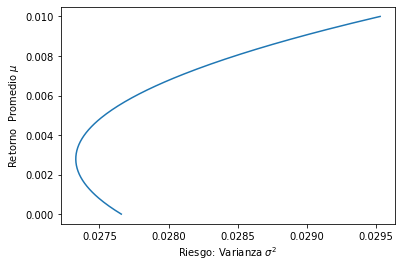

In [121]:
#varAx = np.linspace(0, 1.6*max([S[i, i] for i in range(m)]), 200)
mus = np.linspace(-0.0, 0.01, 200)
frontera = (A*mus**2 - 2*mus*B + C)/D

plt.plot(frontera, mus)
plt.xlabel("Riesgo: Varianza $\sigma^2$")
plt.ylabel("Retorno  Promedio $\mu$")